<a href="https://colab.research.google.com/github/sergionl/trabajoIA/blob/main/Copia_de_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Codigo usado para mostrar grafos
Codigo obetenido en la clase de complejidad algoritmica del ciclo 2021-1 dictada por el profesor luis canabal


In [1]:
import graphviz as gv
import networkx as nx

def nx2gv(G, weighted=False, params={'rankdir': 'LR', 'size': '6'},
          path=None, pathparams={'color':'orangered', 'penwidth': '3'},
          nodeinfo=False):
  if G.is_directed():
    g = gv.Digraph('G')
  else:
    g = gv.Graph('G')
  g.attr(**params)

  for u in G.nodes:
    if nodeinfo:
      g.node(str(u), **dict(G.nodes[u]))
    else:
      g.node(str(u))

  for u, v in G.edges():
    if G.is_directed():
      pp = pathparams if path and path[v] == u else {}
    else:
      pp = pathparams if (path and path[v] == u) or (path and path[u] == v) else {}

    if weighted:
      g.edge(str(u), str(v), f"{G.edges[u, v]['weight']}", **pp)
    else:
      g.edge(str(u), str(v), **pp)
      
  return g

##Lista de ciudades

Lima = 0

Arequipa = 1

Cuzco = 2

Chiclayo = 3

Trujillo = 4

Ica = 5

Iquitos = 6

Madre de dios = 7




In [3]:
%%file ciudades.csv
#u,v,w
0,1,6
0,2,9
0,3,3
0,4,8
0,5,9
0,6,8
0,7,7
1,2,7
1,3,4
3,4,6
6,7,1

Writing ciudades.csv


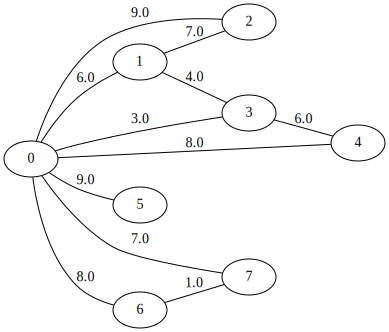

In [4]:
G = nx.read_weighted_edgelist('ciudades.csv', create_using=nx.Graph, delimiter=',', nodetype=int)
nx2gv(G, weighted=True)

In [5]:
#@title Ciudades 
#@markdown Ingrese la ciudad donde se encuentra

no_type_checking = ''
ciudad_inicial = 'LIMA' #@param {type:"string"}

#@markdown Ingrese la ciudad a donde se dirige

ciudad_destino = 'AREQUIPA' #@param {type:"string"}



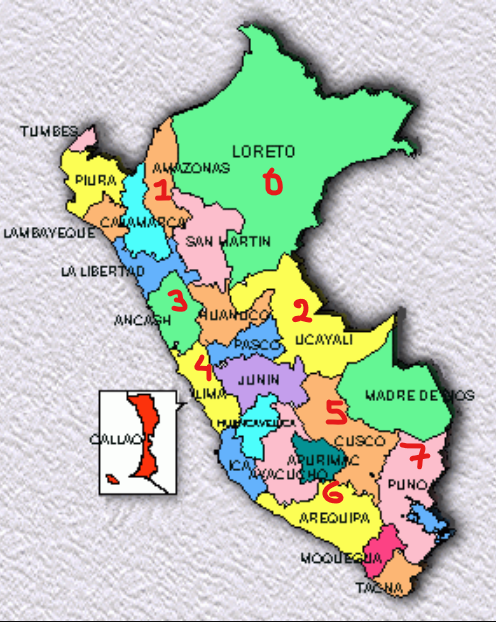

In [8]:
ciudad_inicial = ciudad_inicial.lower()
ciudad_destino = ciudad_destino.lower()
if ciudad_inicial == 'lima':
  inicio = 0
elif ciudad_inicial == 'arequipa':
  inicio = 1
elif ciudad_inicial == 'cuzco':
  inicio = 2
elif ciudad_inicial == 'chiclayo':
  inicio = 3
elif ciudad_inicial == 'trujillo':
  inicio = 4
elif ciudad_inicial == 'ica':
  inicio = 5
elif ciudad_inicial == 'iquitos':
  inicio = 6
elif ciudad_inicial == 'madre de dios':
  inicio = 7
else:
  print("ciudad no disponible")

if ciudad_destino == 'lima':
  fin = 0
elif ciudad_destino == 'arequipa':
  fin = 1
elif ciudad_destino == 'cuzco':
  fin = 2
elif ciudad_destino == 'chiclayo':
  fin = 3
elif ciudad_destino == 'trujillo':
  fin = 4
elif ciudad_destino == 'ica':
  fin = 5
elif ciudad_destino == 'iquitos':
  fin = 6
elif ciudad_destino == 'madre de dios':
  fin = 7
else:
  print("ciudad no disponible")


0 1


In [9]:
import math
import graphviz as gv
import networkx as nx
import heapq as hp
import numpy as np

In [ ]:
h = np.array(
    [[0, 3, 4, 4, 6, 7, 8, 8],
    [3, 0, 3, 2, 4, 6, 7, 8],
    [4, 3, 0, 3, 2, 2, 4, 3],
    [4, 2, 3, 0, 1, 3, 4, 5],
    [6, 4, 2, 1, 0, 2, 3, 4],
    [7, 6, 2, 3, 2, 0, 1, 1],
    [8, 7, 4, 4, 3, 1, 0, 2],
    [8, 8, 3, 5, 4, 1, 2, 0]])

In [ ]:
def cargar_grafo(rutas):
  G = nx.Graph()

  # edges
  for u, v, w in rutas:
    G.add_edge(u, v, weigth=w)
    G.nodes[u]['id'] = u
    G.nodes[v]['id'] = v
    

  # Ojo los nodos se cargan por defecto cuando agregas un arco
  # nodes
  for _, u in G.nodes(data=True):
    u['g'] = None
    u['f'] = None

    u['closedList'] = False
    u['parent'] = None 


  return G


In [ ]:
heuristica(G.nodes[0], G.nodes[1])

3

In [ ]:
#u,v,w
rutas = [[0,1,6],
[0,2,9],
[0,3,3],
[0,4,8],
[0,5,9],
[0,3,8],
[0,2,7],
[1,2,7],
[1,3,4],
[3,6,6],
[6,7,1]]


G = cargar_grafo(rutas)
inicio = G.nodes[0]
fin = G.nodes[7]

camino = aStar(G, inicio, fin)
print(camino)


[7, 6, 3, 0]


In [ ]:
G = nx.Graph()
G.add_edge(1, 2, weight=4.7)
G.add_edge(1, 3, weight=4.2)

for _, v_id, data in G.edges(1, data=True):
  print(_, v_id, w)

1 2 {'weight': 4.2}
1 3 {'weight': 4.2}


In [ ]:
#A-Star
def heuristica(u, v):
  u = u['id']
  v = v['id']
  
  return h[u, v]

def addOpen(u, open_ls):
  tupla = (u['f'], u['id'])
  hp.heappush(open_ls, tupla)
  open_ls = sorted(open_ls)
  
  return open_ls

def aStar(G, source, target):
  open_ls = []           #contiene una tupla, formada por (f, nodo)
  
  source['parent'] = -1
  source['g'] = 0
  source['f'] = heuristica(source, target) + 0   # where g(n) = 0
  open_ls = addOpen(source, open_ls)

  node = None

  while len(open_ls) != 0:
    
    _, node_id = hp.heappop(open_ls)
    node = G.nodes[node_id]

    
    if node['closedList'] == True:
      continue

    if node['id'] == target['id']:
      break

    node['closedList'] = True 

    for _, v_id, data in G.edges(node['id'], data=True):
      v = G.nodes[v_id]
      if v['closedList'] == True:
        continue
      
      g = node['g'] + data['weigth']
      f = g + heuristica(v, target) 

      if v['f'] == None:
        v['g'] = g
        v['f'] = f
        v['parent'] = node['id']
        open_ls = addOpen(v, open_ls)
      
      elif f < v['f']:
        v['g'] = g
        v['f'] = f
        v['parent'] = node['id']
        open_ls = addOpen(v, open_ls)
  
  camino = []
  node = node['id']
  
  while node != -1:
    camino.append(node)
    aux = G.nodes[node]
    node = aux['parent']

  return camino